### 4.1.1 数据优化

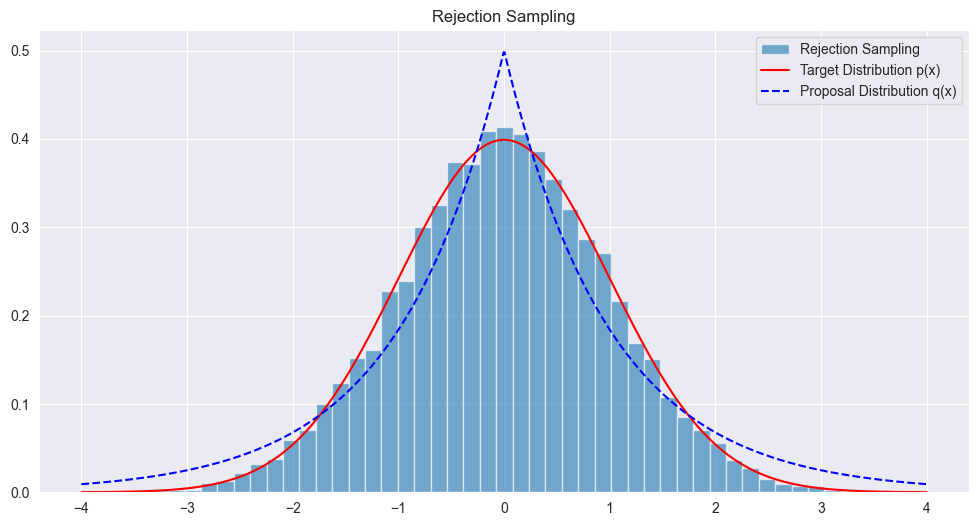

Importance Sampling Estimate for E[x^2]: 1.0147


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标分布 p(x) = (1/sqrt(2*pi)) * exp(-x^2 / 2) (正态分布 PDF)
def p(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# 定义提议分布 q(x) = (1/2) * exp(-|x|) (双边指数分布 PDF)
def q(x):
    return 0.5 * np.exp(-np.abs(x))

# 接受-拒绝采样
def rejection_sampling(num_samples, k):
    samples = []
    while len(samples) < num_samples:
        # 从 q(x) 采样
        x = np.random.laplace(0, 1)  # 双边指数分布
        # 计算接受概率
        acceptance_prob = p(x) / (k * q(x))
        # 从 U(0,1) 中采样 u
        u = np.random.uniform(0, 1)
        if u <= acceptance_prob:
            samples.append(x)
    return np.array(samples)

# 重要性采样
def importance_sampling(num_samples, f):
    # 从 q(x) 中采样
    samples = np.random.laplace(0, 1, num_samples)
    # 计算权重 w(x) = p(x) / q(x)
    weights = p(samples) / q(samples)
    # 计算期望值 E[f(x)]
    weighted_expectation = np.sum(f(samples) * weights) / np.sum(weights)
    return samples, weights, weighted_expectation

# 参数设置
num_samples = 10000
k = np.sqrt(2 * np.e / np.pi)  # 确定常数 k

# 接受-拒绝采样
rejection_samples = rejection_sampling(num_samples, k)

# 重要性采样 (f(x) = x^2)
f = lambda x: x**2
importance_samples, importance_weights, importance_estimate = importance_sampling(num_samples, f)

# 绘制结果
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(12, 6))

# 接受-拒绝采样的分布
plt.hist(rejection_samples, bins=50, density=True, alpha=0.6, label="Rejection Sampling")

# 目标分布
plt.plot(x, p(x), 'r-', label="Target Distribution p(x)")

# 提议分布
plt.plot(x, q(x), 'b--', label="Proposal Distribution q(x)")

plt.title("Rejection Sampling")
plt.legend()
plt.show()

# 输出重要性采样的结果
print(f"Importance Sampling Estimate for E[x^2]: {importance_estimate:.4f}")


#### **问题**
目标是用接受-拒绝采样和重要性采样来近似目标分布 $ p(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2} $ 的性质，其中 $x \in \mathbb{R}$，这是标准正态分布的概率密度函数。

由于 $ p(x) $ 的形式复杂，直接从中采样比较困难，因此我们选择一个容易采样的提议分布 $ q(x) = \frac{1}{2} e^{-|x|} $（双边指数分布，容易采样）。

我们希望通过这两个方法：
1. 从 $ p(x) $ 中生成样本（接受-拒绝采样）。
2. 估计目标分布下的期望 $ \mathbb{E}[f(x)] $，例如 $ f(x) = x^2 $（重要性采样）。

---

### **接受-拒绝采样的步骤**
1. **选取提议分布 $ q(x) $**  
   提议分布 $ q(x) = \frac{1}{2} e^{-|x|} $，其形式简单，支持集 $ x \in \mathbb{R} $ 和 $ p(x) $ 一致。

2. **确定 $ k $**  
   找到一个常数 $ k $ 满足 $ p(x) \leq k \cdot q(x) $ 对所有 $ x $ 都成立：  
   $$
   \frac{p(x)}{q(x)} = \frac{\frac{1}{\sqrt{2\pi}} e^{-x^2}}{\frac{1}{2} e^{-|x|}} = \frac{2}{\sqrt{2\pi}} e^{-|x| + x^2}.
   $$  
   经过分析，取 $ k = \sqrt{2e/\pi} $ 可以满足约束。

3. **采样与接受条件**  
   - 从 $ q(x) $ 中采样一个 $ x $。
   - 计算接受概率 $ \alpha = \frac{p(x)}{kq(x)} = \frac{1}{k} e^{-x^2 + |x|} $。
   - 从 $ U(0, 1) $ 中采样 $ u $，如果 $ u \leq \alpha $，则接受 $ x $，否则拒绝。

4. **重复采样**  
   多次重复以上过程，直到获得 $ N $ 个近似服从 $ p(x) $ 的样本。

---

### **重要性采样的步骤**
1. **选取提议分布 $ q(x) $**  
   提议分布同样为 $ q(x) = \frac{1}{2} e^{-|x|} $。

2. **计算重要性权重**  
   对于从 $ q(x) $ 中采样的 $ x_i $，计算权重：  
   $$
   w(x_i) = \frac{p(x_i)}{q(x_i)} = \frac{\frac{1}{\sqrt{2\pi}} e^{-x_i^2}}{\frac{1}{2} e^{-|x_i|}} = \frac{2}{\sqrt{2\pi}} e^{-|x_i| + x_i^2}.
   $$

3. **估计期望**  
   如果目标是计算 $ \mathbb{E}[f(x)] = \int f(x) p(x) dx $，我们可以用重要性采样估计：  
   $$
   \mathbb{E}[f(x)] \approx \frac{\sum_{i=1}^n f(x_i) w(x_i)}{\sum_{i=1}^n w(x_i)}.
   $$ 
   例如，如果 $ f(x) = x^2 $，则  
   $$
   \mathbb{E}[x^2] \approx \frac{\sum_{i=1}^n x_i^2 w(x_i)}{\sum_{i=1}^n w(x_i)}.
   $$

---

   标准正态分布中，任意偶次幂 $ \mathbb{E}[x^{2n}] $ 的期望值与以下公式相关：
   $$
   \mathbb{E}[x^{2n}] = (2n - 1)!! \cdot \sigma^{2n},
   $$
   其中 $ (2n - 1)!! $ 是双阶乘。

因此，我们可以计算 $ \mathbb{E}[x^2] $ 的真实值：
   $$
   \mathbb{E}[x^2] = 1.
   $$
这与重要性采样的估计值基本一致。



卡方检验的置信区间

In [2]:
import scipy.stats as stats

def chi2_low_up(D):
    lower_bound = stats.chi2.ppf(0.025, D)
    upper_bound = stats.chi2.ppf(0.975, D)
    print(f"D={D}, 2.5%: {lower_bound:.2f}, 97.5%: {upper_bound:.2f}")

# D是自由度，相当于维度
for D in [2, 10, 50, 100, 1000]:
    chi2_low_up(D)


D=2, 2.5%: 0.05, 97.5%: 7.38
D=10, 2.5%: 3.25, 97.5%: 20.48
D=50, 2.5%: 32.36, 97.5%: 71.42
D=100, 2.5%: 74.22, 97.5%: 129.56
D=1000, 2.5%: 914.26, 97.5%: 1089.53


### 4.1.2 降维
这里使用鸢尾花数据集是因为其没有缺失值，方便直接降维

E:\Py-Project\DataScience\venv\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
E:\Py-Project\DataScience\venv\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


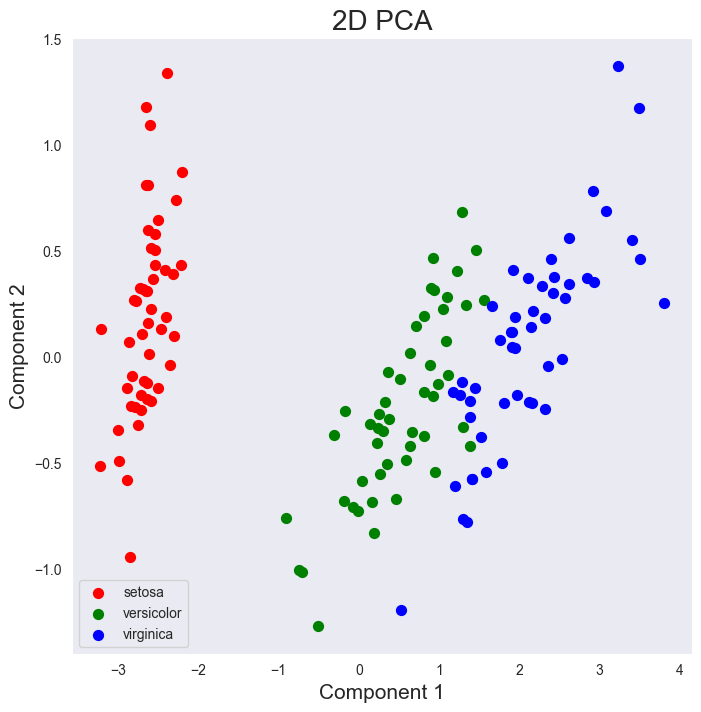

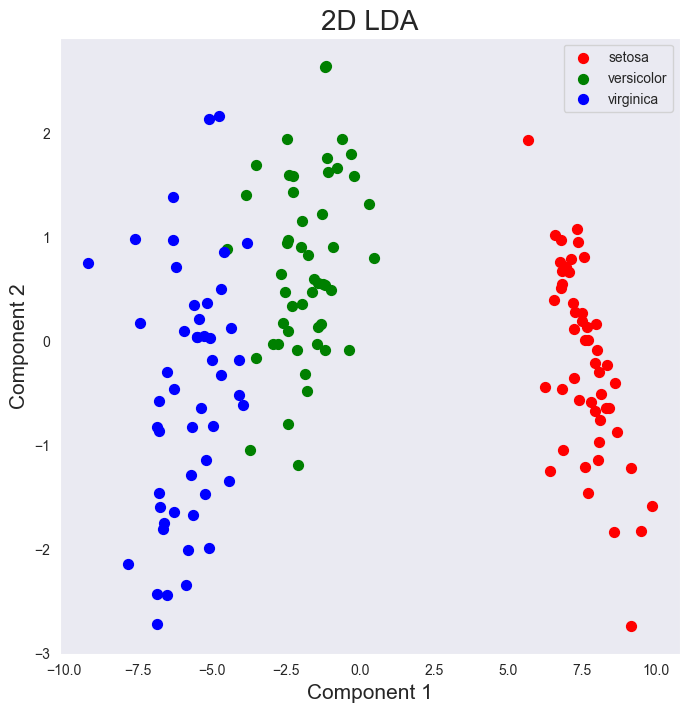

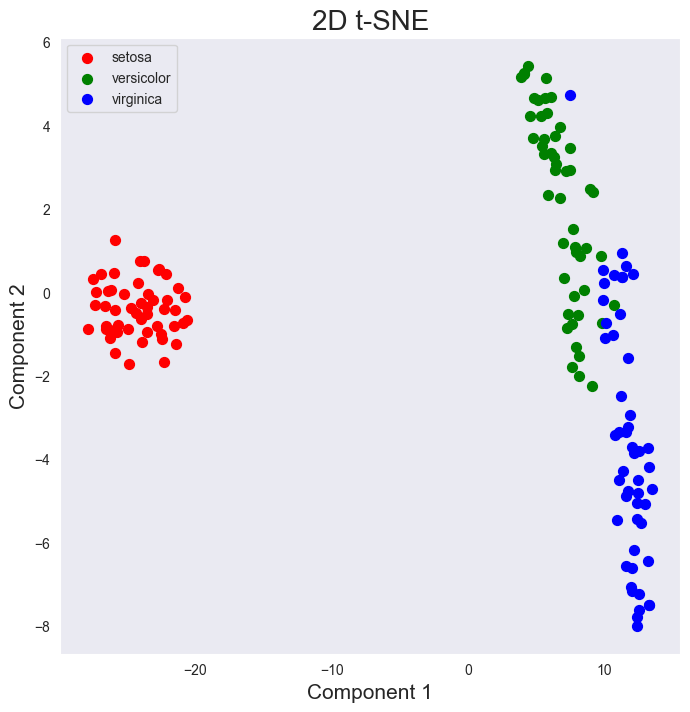

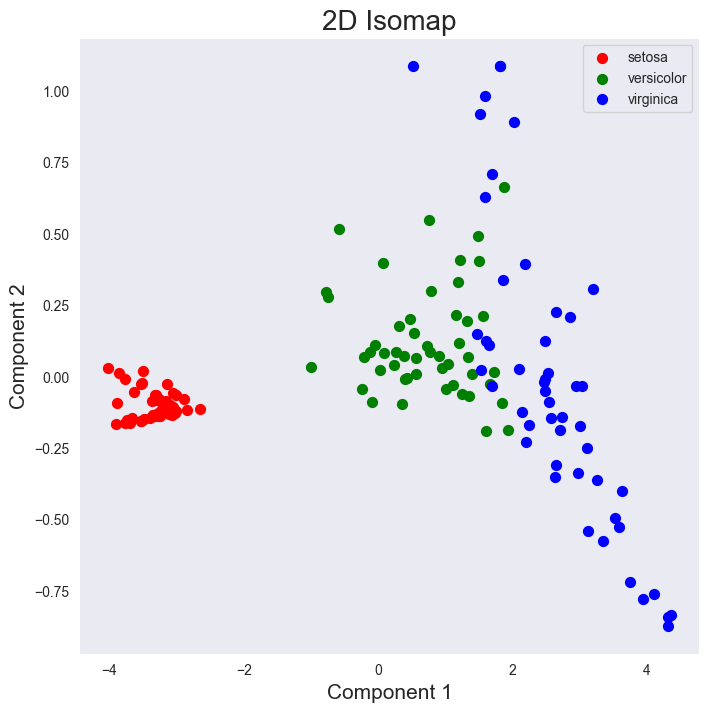

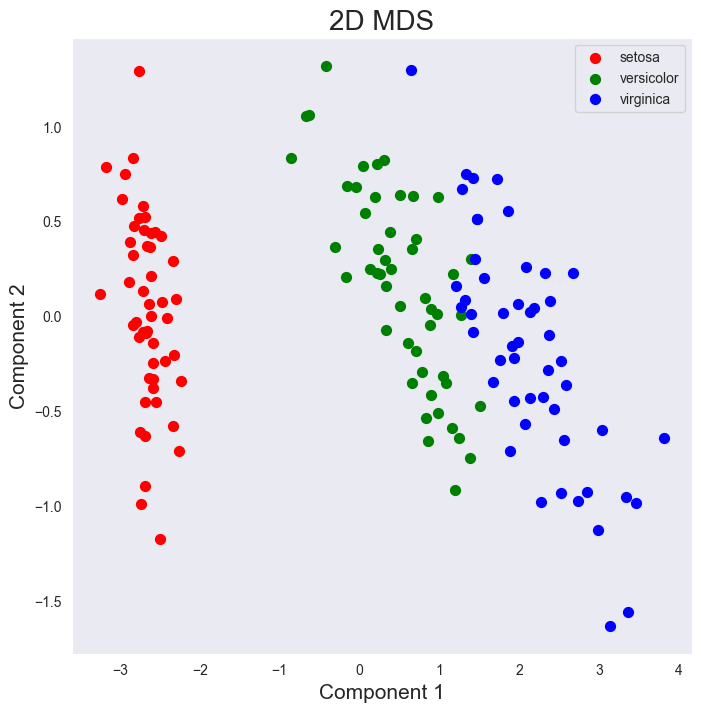

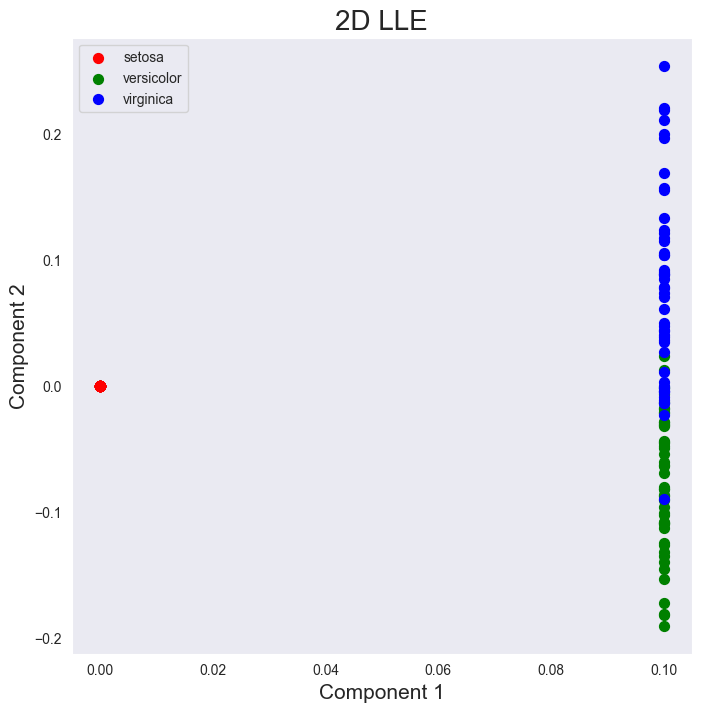

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding as LLE
import matplotlib.pyplot as plt

# 加载 Iris 数据集
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 数据框格式化
data = pd.DataFrame(X, columns=['feature1', 'feature2', 'feature3', 'feature4'])
data['target'] = y

# 可视化函数
def plot_2d(data, title, targets, target_names, xlabel='Component 1', ylabel='Component 2'):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_title(title, fontsize=20)
    colors = ['r', 'g', 'b']
    for target, color, target_name in zip(targets, colors, target_names):
        indices_to_keep = data['target'] == target
        ax.scatter(data.loc[indices_to_keep, 'component1'], 
                   data.loc[indices_to_keep, 'component2'], 
                   c=color, s=50, label=target_name)
    ax.legend()
    ax.grid()
    plt.show()

# 降维函数
def apply_dim_reduction(method, data, labels, n_components=2, **kwargs):
    """
    method: 降维方法对象，例如 PCA(), LDA(), TSNE() 等
    data: 输入特征数据
    labels: 标签数据（仅在 LDA 中使用）
    n_components: 降维到的维度
    kwargs: 降维方法的额外参数
    """
    reducer = method(n_components=n_components, **kwargs)
    if isinstance(method(), LDA):
        reduced = reducer.fit_transform(data, labels)
    else:
        reduced = reducer.fit_transform(data)
    df_reduced = pd.DataFrame(reduced, columns=[f'component{i+1}' for i in range(n_components)])
    df_reduced['target'] = labels
    return df_reduced

# 执行不同的降维方法
pca_result = apply_dim_reduction(PCA, X, y)
lda_result = apply_dim_reduction(LDA, X, y)
tsne_result = apply_dim_reduction(TSNE, X, y)
isomap_result = apply_dim_reduction(Isomap, X, y, n_neighbors=10)
mds_result = apply_dim_reduction(MDS, X, y)
lle_result = apply_dim_reduction(LLE, X, y, n_neighbors=10)

# 可视化降维结果
plot_2d(pca_result, "2D PCA", targets=[0, 1, 2], target_names=target_names)
plot_2d(lda_result, "2D LDA", targets=[0, 1, 2], target_names=target_names)
plot_2d(tsne_result, "2D t-SNE", targets=[0, 1, 2], target_names=target_names)
plot_2d(isomap_result, "2D Isomap", targets=[0, 1, 2], target_names=target_names)
plot_2d(mds_result, "2D MDS", targets=[0, 1, 2], target_names=target_names)
plot_2d(lle_result, "2D LLE", targets=[0, 1, 2], target_names=target_names)


### 4.1.3 集成学习

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 加载鸢尾花数据集
def load_data():
    data = load_iris()
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Bagging 方法
def bagging_classifier(X_train, X_test, y_train, y_test):
    # 使用决策树作为基模型
    bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print("\n=== Bagging Results ===")
    print(f"Accuracy: {acc}")
    print(classification_report(y_test, y_pred))
    return acc

# Boosting 方法
def boosting_classifier(X_train, X_test, y_train, y_test):
    # 使用决策树作为弱分类器
    boosting_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
    boosting_model.fit(X_train, y_train)
    y_pred = boosting_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print("\n=== Boosting Results ===")
    print(f"Accuracy: {acc}")
    print(classification_report(y_test, y_pred))
    return acc

# Stacking 方法
def stacking_classifier(X_train, X_test, y_train, y_test):
    # 定义基模型和元模型
    base_models = [
        ('dt', DecisionTreeClassifier(max_depth=3)),
        ('svc', SVC(probability=True)),
    ]
    meta_model = LogisticRegression()

    # 构建 Stacking 模型
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
    stacking_model.fit(X_train, y_train)
    y_pred = stacking_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print("\n=== Stacking Results ===")
    print(f"Accuracy: {acc}")
    print(classification_report(y_test, y_pred))
    return acc



In [4]:
# 加载数据
X_train, X_test, y_train, y_test = load_data()

# Bagging 方法
bagging_acc = bagging_classifier(X_train, X_test, y_train, y_test)

# Boosting 方法
boosting_acc = boosting_classifier(X_train, X_test, y_train, y_test)

# Stacking 方法
stacking_acc = stacking_classifier(X_train, X_test, y_train, y_test)

print("\n=== Summary ===")
print(f"Bagging Accuracy: {bagging_acc}")
print(f"Boosting Accuracy: {boosting_acc}")
print(f"Stacking Accuracy: {stacking_acc}")


=== Bagging Results ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


=== Boosting Results ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


=== Stacking Results ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
          

E:\Py-Project\DataScience\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


下面三个是书里面的代码，但我还是使用鸢尾花数据集进行实验，如果需要原书的效果，请把下一个代码块的load_wine代码的注释取消掉

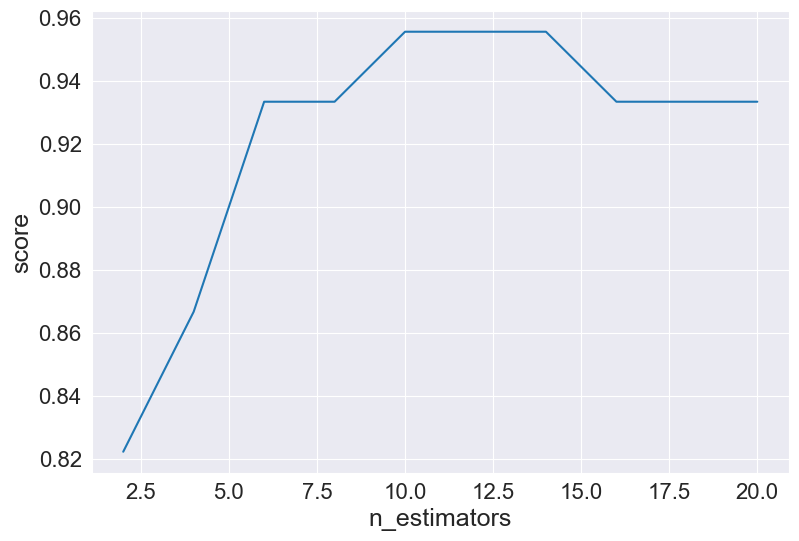

In [24]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

# data = datasets.load_wine(as_frame = True)
# 
# X = data.data
# y = data.target
# 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [2,4,6,8,10,12,14,16,18,20]

models = []
scores = []

for n_estimators in estimator_range:
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)
    clf.fit(X_train, y_train)
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

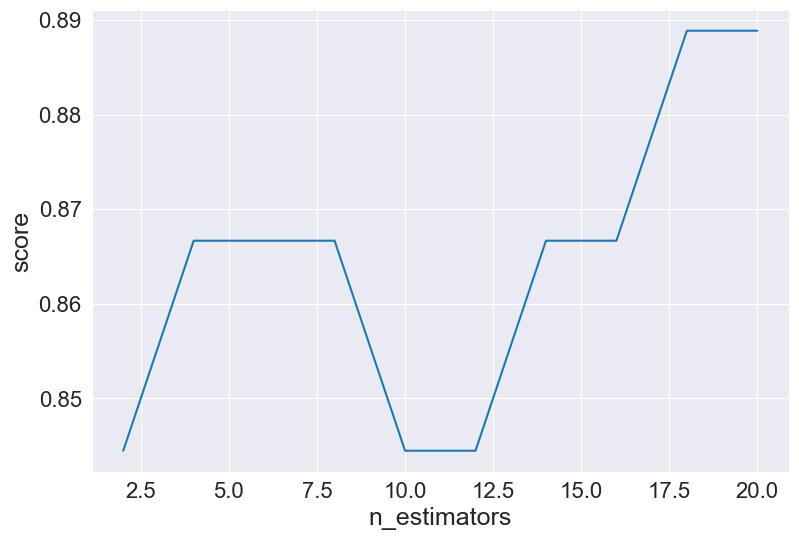

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
estimator_range = [2,4,6,8,10,12,14,16,18,20]

models = []
scores = []

for n_estimators in estimator_range:
    clf = GradientBoostingClassifier(n_estimators = n_estimators, random_state = 42)
    clf.fit(X_train, y_train)
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import accuracy_score

svclf = svm.SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
treeclf = DecisionTreeClassifier()
gbdtclf = GradientBoostingClassifier(learning_rate=0.7)
lrclf = LogisticRegression()

stack_clf = StackingCVClassifier(
    classifiers=[svclf, treeclf, gbdtclf], meta_classifier=lrclf, cv=4)

stack_clf.fit(X_train, y_train)
stack_clf_pred = stack_clf.predict(X_test)
print(accuracy_score(stack_clf_pred, y_test))

0.8888888888888888


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 定义参数网格
param_grid = [
    {
        'scaler': [StandardScaler()],
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 150],  # 注意这里的参数名需要加上前缀，50, 100, 150 分别为三个参数值
        'classifier__max_depth': [None, 10, 20]
    },
    {
        'scaler': [MinMaxScaler()],
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20]  
    },
    {
        'scaler': [StandardScaler()],
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7]
    }
]

# 创建Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# 进行网格搜索
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# 在测试集上评估最佳模型
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.4f}".format(accuracy))



Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters found:  {'classifier': RandomForestClassifier(), 'classifier__max_depth': None, 'classifier__n_estimators': 50, 'scaler': StandardScaler()}
Best cross-validation accuracy: 0.9500
Test set accuracy: 1.0000


15 candidates来自param_grid: 15 = (3*3) + 3 + 3

使用更简单的adj_params传参
下面给出网络、随机、贝叶斯、梯度、进化搜索的例子

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 加载鸢尾花数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 定义模型和超参数范围
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],  # 决策树数量
    'max_depth': [None, 10, 20],    # 树的最大深度
    'min_samples_split': [2, 5, 10] # 内部节点再划分所需最小样本数
}

# 使用 GridSearchCV 进行超参数搜索
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数和交叉验证准确率
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# 在测试集上评估最佳模型
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nTest set accuracy: {:.4f}".format(accuracy))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.9583

Test set accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 加载数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 定义模型和参数分布
model = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(50, 150, 10)],  # 树的数量
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 进行随机搜索
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# 输出最佳参数和测试集表现
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Random Search Best Parameters: ", random_search.best_params_)
print("Random Search Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Search Best Parameters:  {'n_estimators': 94, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Random Search Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 加载数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 定义模型和参数搜索空间
model = RandomForestClassifier(random_state=42)
param_space = {
    'n_estimators': (50, 150),        # 树的数量
    'max_depth': (10, 30),            # 最大深度
    'min_samples_split': (2, 10),     # 分裂所需最小样本数
    'min_samples_leaf': (1, 4)        # 叶节点最小样本数
}

# 贝叶斯优化搜索
bayes_search = BayesSearchCV(
    model, search_spaces=param_space, n_iter=20, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)
bayes_search.fit(X_train, y_train)

# 输出结果
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Bayesian Search Best Parameters: ", bayes_search.best_params_)
print("Bayesian Search Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))


Bayesian Search Best Parameters:  OrderedDict([('max_depth', 18), ('min_samples_leaf', 3), ('min_samples_split', 9), ('n_estimators', 82)])
Bayesian Search Accuracy: 1.0000


In [35]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 加载数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 定义优化目标函数
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    model = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    return accuracy_score(y_train, model.predict(X_train))  # 返回训练集准确率

# 使用 Optuna 优化
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# 评估测试集
best_params = study.best_params
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Gradient Search Best Parameters: ", best_params)
print("Gradient Search Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))


[I 2024-11-29 20:51:25,803] A new study created in memory with name: no-name-b2719358-7a9a-4ad3-a46b-05086749a11d
[I 2024-11-29 20:51:25,911] Trial 0 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 99, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9666666666666667.
[I 2024-11-29 20:51:25,966] Trial 1 finished with value: 0.975 and parameters: {'n_estimators': 50, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.975.
[I 2024-11-29 20:51:26,078] Trial 2 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.975.
[I 2024-11-29 20:51:26,217] Trial 3 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 136, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.975.
[I 2024-11-29 20:51:26,300] Tri

Gradient Search Best Parameters:  {'n_estimators': 72, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 1}
Gradient Search Accuracy: 1.0000


In [36]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 加载数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 使用 TPOT 进行进化搜索
tpot = TPOTClassifier(generations=5, population_size=20, cv=3, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# 输出测试集结果
y_pred = tpot.predict(X_test)
print("Evolutionary Search Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.975

Generation 2 - Current best internal CV score: 0.9833333333333334

Generation 3 - Current best internal CV score: 0.9833333333333334

Generation 4 - Current best internal CV score: 0.9833333333333334

Generation 5 - Current best internal CV score: 0.9833333333333334

Best pipeline: MLPClassifier(MultinomialNB(input_matrix, alpha=10.0, fit_prior=False), alpha=0.001, learning_rate_init=0.1)
Evolutionary Search Accuracy: 1.0000
